# Part A

**DOMAIN** : Automobiles

**CONTEXT** : There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed 
down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than 
the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market. In 2018-19, 
while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. 
There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned 
market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new 
cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / 
except for dealership level discounts which come into play only in the last stage of the customer journey), used 
cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing 
scheme of these used cars becomes important in order to grow in the market. As a senior data scientist at Cars4U, 
you have to come up with a pricing model that can effectively predict the price of used cars and can help the 
business in devising profitable strategies using differential pricing. For example, if the business knows the market 
price, it will never sell anything below it. 

**DATA DESCRIPTION** : The data contains the different attributes of used cars sold in different locations. The 
detailed data dictionary is given below. 

**DATA DICTIONARY** : 
1. S.No.: Serial number 
2. Name: Name of the car which includes brand name and model name 
3. Location: Location in which the car is being sold or is available for purchase (cities) 
4. Year: Manufacturing year of the car 
5. Kilometres_driven: The total kilometers driven in the car by the previous owner(s) in km 
6. Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG) 
7. Transmission: The type of transmission used by the car (Automatic/Manual) 
8. Owner: Type of ownership 
9. Mileage: The standard mileage offered by the car company in kmpl or km/kg 
10. Engine: The displacement volume of the engine in CC 
11. Power: The maximum power of the engine in bhp 
12. Seats: The number of seats in the car 
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR) 
14. Price: The price of the used car in INR Lakhs 

**PROJECT OBJECTIVE**:
To explore and visualise the dataset, build a linear regression model to predict the prices of used cars, and generate 
a set of insights and recommendations that will help the business 

## STEPS AND TASKS 
 
### 1. Data Understanding and Preparation: 
#### A. Read the ‘used_cars_data.csv’ dataset, check the dimensions and print the first 10 rows.

In [1]:
import pandas as pd
import numpy as np
# Read the dataset
df = pd.read_csv('used_cars_data (5).csv')

In [2]:
# Check the dimensions
dimensions = df.shape
print(f"The dataset contains {dimensions[0]} rows and {dimensions[1]} columns.")

The dataset contains 7253 rows and 14 columns.


In [3]:
# Print the first 10 rows
print(df.head(10))

   S.No.                                 Name    Location  Year  \
0      0               Maruti Wagon R LXI CNG      Mumbai  2010   
1      1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                         Honda Jazz V     Chennai  2011   
3      3                    Maruti Ertiga VDI     Chennai  2012   
4      4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5      5      Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6      6               Nissan Micra Diesel XV      Jaipur  2013   
7      7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8      8  Volkswagen Vento Diesel Comfortline        Pune  2013   
9      9       Tata Indica Vista Quadrajet LS     Chennai  2012   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    P

#### B. Check data types and duplicate values in the data-frame. Treat the duplicates if any, with an explanation to your approach.  

In [4]:
# Check data types
print(df.dtypes)

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
dtype: object


In [5]:
# Check for duplicate values
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [6]:
# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Verify if duplicates are removed
print(f"Number of rows after removing duplicates: {df_no_duplicates.shape[0]}")

Number of rows after removing duplicates: 7253


Since there aren't any duplicate rows, the number of rows after removing duplicates in same as original (7253)

#### C. Observe if there’s any relationship between the units given in the mileage column and the Fuel_Type. Split mileage column into numeric values and units.

In [7]:
# Extract numeric values and units from Mileage column
df_no_duplicates['Mileage_Value'] = df_no_duplicates['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
df_no_duplicates['Mileage_Unit'] = df_no_duplicates['Mileage'].str.extract('([a-zA-Z/]+)')

# Display the DataFrame to verify
print(df_no_duplicates)


      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [8]:
# Cross-tabulation to see the relationship
mileage_fuel_relationship = pd.crosstab(df_no_duplicates['Mileage_Unit'], df_no_duplicates['Fuel_Type'])

# Display the cross-tabulation
print(mileage_fuel_relationship)

Fuel_Type     CNG  Diesel  LPG  Petrol
Mileage_Unit                          
km/kg          62       0   12       0
kmpl            0    3852    0    3325


Splitting Mileage: We used regular expressions to split the Mileage column into Mileage_Value (numeric part) and Mileage_Unit (unit part).
Analyzing Relationship: The cross-tabulation shows the count of each fuel type within each mileage unit category.
From the output, we can observe:

km/kg unit is associated with CNG fuel type.
kmpl unit is associated with both Diesel and Petrol fuel types.
This indicates that the mileage unit km/kg is exclusively used for CNG cars, while kmpl is used for both Diesel and Petrol cars.


#### D. Extract numeric values from ‘Engine’, ‘Power’ and ‘New_Price’. Check for variation in their units and drop the units if necessary

In [9]:
df2 = df_no_duplicates

# Extract numeric values from 'Engine' and 'Power'
df2['Engine_Value'] = df2['Engine'].str.extract('(\d+)').astype(float)
df2['Power_Value'] = df2['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)
df2['New_Price_Value'] = df2['New_Price'].astype(float)  # Assuming 'New_Price' is already in a numeric format

# Display the DataFrame to verify
print(df2[['Engine', 'Engine_Value', 'Power', 'Power_Value', 'New_Price', 'New_Price_Value']].head())


    Engine  Engine_Value      Power  Power_Value  New_Price  New_Price_Value
0   998 CC         998.0  58.16 bhp        58.16       5.51             5.51
1  1582 CC        1582.0  126.2 bhp       126.20      16.06            16.06
2  1199 CC        1199.0   88.7 bhp        88.70       8.61             8.61
3  1248 CC        1248.0  88.76 bhp        88.76      11.27            11.27
4  1968 CC        1968.0  140.8 bhp       140.80      53.14            53.14


In [10]:
# Check unique values for units in 'Engine' and 'Power' columns
engine_units = df2['Engine'].str.extract('([a-zA-Z]+)').iloc[:, 0].unique()
power_units = df2['Power'].str.extract('([a-zA-Z]+)').iloc[:, 0].unique()

print(f"Engine units: {engine_units}")
print(f"Power units: {power_units}")

Engine units: ['CC' nan]
Power units: ['bhp' nan]


The Engine column has only 'CC' units.
The Power column has only 'bhp' units.
There are no variations in the units, so we can drop the units and keep only the numeric values for these columns. We will also remove any rows where the units are missing (nan), but in this case, it appears that the units are consistent.

In [11]:
# Drop the original 'Engine' and 'Power' columns
df2 = df2.drop(columns=['Engine', 'Power','New_Price_Value'])

# Rename the new columns to retain only numeric values
df2.rename(columns={'Engine_Value': 'Engine', 'Power_Value': 'Power'}, inplace=True)

In [12]:
print(df2.head())

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  Seats  \
0              72000       CNG       Manual      First  26.6 km/kg    5.0   
1              41000    Diesel       Manual      First  19.67 kmpl    5.0   
2              46000    Petrol       Manual      First   18.2 kmpl    5.0   
3              87000    Diesel       Manual      First  20.77 kmpl    7.0   
4              40670    Diesel    Automatic     Second   15.2 kmpl    5.0   

   New_Price  Price  Mileage_Value Mileage_Unit  Engine   Power  
0       5.51   1.75          26.60        km/kg   998.0   58.16  
1      16.06  12.50 

#### E. Extract the Car Brand Name and Model Name from the ‘Name’ column.

In [13]:
# Split the 'Name' column into 'Brand' and 'Model'
df2[['Brand', 'Model']] = df2['Name'].str.split(' ', n=1, expand=True)

# Display the updated DataFrame with the new columns
print(df2[['Name', 'Brand', 'Model']].head())


                               Name    Brand                       Model
0            Maruti Wagon R LXI CNG   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V    Honda                      Jazz V
3                 Maruti Ertiga VDI   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic     Audi  A4 New 2.0 TDI Multitronic


#### F. Create new variables by log transforming ‘Price’ and ‘Kilometers_Driven’ columns as ‘price_log’ and ‘kilometers_driven_log’

In [14]:
# Log-transform 'Price' and 'Kilometers_Driven' columns
df2['price_log'] = np.log(df2['Price'])
df2['kilometers_driven_log'] = np.log(df2['Kilometers_Driven'])

# Display the updated DataFrame
print(df2[['Price', 'price_log', 'Kilometers_Driven', 'kilometers_driven_log']].head())


   Price  price_log  Kilometers_Driven  kilometers_driven_log
0   1.75   0.559616              72000              11.184421
1  12.50   2.525729              41000              10.621327
2   4.50   1.504077              46000              10.736397
3   6.00   1.791759              87000              11.373663
4  17.74   2.875822              40670              10.613246


np.log(): This function from the NumPy library computes the natural logarithm of the values in the specified column.
df['Price']: Accesses the 'Price' column in the DataFrame.
df['Kilometers_Driven']: Accesses the 'Kilometers_Driven' column in the DataFrame.
df['price_log']: Creates a new column named 'price_log' in the DataFrame to store the log-transformed 'Price' values.
df['kilometers_driven_log']: Creates a new column named 'kilometers_driven_log' in the DataFrame to store the log-transformed 'Kilometers_Driven' values.

#### G. Drop the redundant columns and print a 5-point summary of the data-frame and share your observation.

In [15]:
# Drop redundant columns
df2 = df2.drop(columns=['Mileage','S.No.','Name'])
# Print a 5-point summary
print(df2.describe())
print(df2.info())

              Year  Kilometers_Driven        Seats    New_Price        Price  \
count  7253.000000       7.253000e+03  7200.000000  7253.000000  6019.000000   
mean   2013.365366       5.869906e+04     5.279722    21.307322     9.479468   
std       3.254421       8.442772e+04     0.811660    24.256314    11.187917   
min    1996.000000       1.710000e+02     0.000000     3.910000     0.440000   
25%    2011.000000       3.400000e+04     5.000000     7.880000     3.500000   
50%    2014.000000       5.341600e+04     5.000000    11.300000     5.640000   
75%    2016.000000       7.300000e+04     5.000000    21.690000     9.950000   
max    2019.000000       6.500000e+06    10.000000   375.000000   160.000000   

       Mileage_Value       Engine        Power    price_log  \
count    7251.000000  7207.000000  7078.000000  6019.000000   
mean       18.141580  1616.573470   112.765214     1.825095   
std         4.562197   595.285137    53.493553     0.874059   
min         0.000000    72.

Year: The average year of the cars in the dataset is around 2013, with the minimum being 1996 and the maximum being 2019. This suggests that the dataset includes cars spanning a wide range of years, with a concentration of cars manufactured in the early to mid-2010s.

Seats: The average number of seats in the cars is approximately 5.28. The data has a minimum of 0 seats, which seems like an anomaly and might need further investigation. The maximum number of seats is 10, indicating that some cars in the dataset are larger, potentially SUVs or minivans.

New_Price: The average new price of the cars is around 21.31 Lakhs INR, with a significant standard deviation of 24.26 Lakhs INR. This indicates a wide variation in the prices of new cars in the dataset.

Engine: The engine displacement ranges from 72 CC to 5998 CC, with an average engine size of approximately 1616 CC. This indicates a variety of car types in the dataset, from small compact cars to larger vehicles.

Power: The power of the cars' engines ranges from 34.2 bhp to 616 bhp, with an average power of around 112.77 bhp. Again, this suggests a variety of cars with different power capabilities.

Price_Log: The log-transformed prices have a minimum value of approximately -0.82 and a maximum value of around 5.08. This indicates a wide range of prices in the dataset, with some cars being significantly more expensive than others.

Kilometers_Driven_Log: The log-transformed kilometers driven have a minimum value of approximately 5.14 and a maximum value of around 15.69. This suggests a wide range of kilometers driven by the cars in the dataset, with some cars having significantly higher mileage than others.

Overall, the dataset contains a diverse range of cars in terms of age, size, price, engine size, power, and mileage. Further analysis could involve exploring correlations between these variables, identifying outliers, and building predictive models for car prices based on these features.

#### H. Check the missing values and extreme values in the dataset and impute them.

In [16]:
# Check for missing values
missing_values = df2.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
New_Price                   0
Price                    1234
Mileage_Value               2
Mileage_Unit                2
Engine                     46
Power                     175
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64


In [17]:
# Check for extreme values
extreme_values = df2.describe(percentiles=[0.01, 0.99])
print("\nExtreme Values:")
print(extreme_values)


Extreme Values:
              Year  Kilometers_Driven        Seats    New_Price        Price  \
count  7253.000000       7.253000e+03  7200.000000  7253.000000  6019.000000   
mean   2013.365366       5.869906e+04     5.279722    21.307322     9.479468   
std       3.254421       8.442772e+04     0.811660    24.256314    11.187917   
min    1996.000000       1.710000e+02     0.000000     3.910000     0.440000   
1%     2004.000000       4.074160e+03     4.000000     4.360000     0.900000   
50%    2014.000000       5.341600e+04     5.000000    11.300000     5.640000   
99%    2019.000000       1.734800e+05     8.000000   120.000000    56.000000   
max    2019.000000       6.500000e+06    10.000000   375.000000   160.000000   

       Mileage_Value       Engine        Power    price_log  \
count    7251.000000  7207.000000  7078.000000  6019.000000   
mean       18.141580  1616.573470   112.765214     1.825095   
std         4.562197   595.285137    53.493553     0.874059   
min       

In [18]:
# Impute missing or extreme values
# For numeric columns, you can impute missing values with mean or median
numeric_cols = ['Seats', 'Engine', 'Power', 'price_log', 'kilometers_driven_log']
for col in numeric_cols:
    df2[col].fillna(df2[col].median(), inplace=True)

# For categorical columns, you can impute missing values with mode
categorical_cols = ['Brand', 'Model', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_cols:
    df2[col].fillna(df2[col].mode()[0], inplace=True)

# Check if missing values have been imputed
print("\nMissing Values After Imputation:")
print(df2.isnull().sum())



Missing Values After Imputation:
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1234
Mileage_Value               2
Mileage_Unit                2
Engine                      0
Power                       0
Brand                       0
Model                       0
price_log                   0
kilometers_driven_log       0
dtype: int64


In [19]:
# Impute missing values in the 'Mileage' column with the mode
df2['Mileage_Value'].fillna(df2['Mileage_Value'].mode()[0], inplace=True)
df2['Mileage_Unit'].fillna(df2['Mileage_Unit'].mode()[0], inplace=True)

# Check if missing values have been imputed
print("\nMissing Values After Imputation:")
print(df2.isnull().sum())



Missing Values After Imputation:
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
New_Price                   0
Price                    1234
Mileage_Value               0
Mileage_Unit                0
Engine                      0
Power                       0
Brand                       0
Model                       0
price_log                   0
kilometers_driven_log       0
dtype: int64


#### I. Check the distribution of non-numeric features (display the first 10 values if the number of categories/ classes are more than 10)

In [20]:
# Select non-numeric columns
non_numeric_cols = df2.select_dtypes(include=['object']).columns

# Loop through non-numeric columns
for col in non_numeric_cols:
    unique_values = df2[col].unique()
    num_unique_values = len(unique_values)
    print(f"\nColumn: {col}")
    if num_unique_values > 10:
        print(unique_values[:10])
    else:
        print(unique_values)



Column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore']

Column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']

Column: Transmission
['Manual' 'Automatic']

Column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']

Column: Mileage_Unit
['km/kg' 'kmpl']

Column: Brand
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi']

Column: Model
['Wagon R LXI CNG' 'Creta 1.6 CRDi SX Option' 'Jazz V' 'Ertiga VDI'
 'A4 New 2.0 TDI Multitronic' 'EON LPG Era Plus Option' 'Micra Diesel XV'
 'Innova Crysta 2.8 GX AT 8S' 'Vento Diesel Comfortline'
 'Indica Vista Quadrajet LS']


#### J. Share the average of used car prices by brand.

In [21]:
# Calculate the average used car prices by brand
average_prices_by_brand = df2.groupby('Brand')['Price'].mean()

# Display the average prices by brand
print("Average Used Car Prices by Brand:")
print(average_prices_by_brand)


Average Used Car Prices by Brand:
Brand
Ambassador         1.350000
Audi              25.537712
BMW               25.243146
Bentley           59.000000
Chevrolet          3.044463
Datsun             3.049231
Fiat               3.269286
Force              9.333333
Ford               6.889400
Hindustan               NaN
Honda              5.411743
Hyundai            5.343433
ISUZU             12.045000
Isuzu             20.000000
Jaguar            37.632250
Jeep              18.718667
Lamborghini      120.000000
Land              39.259500
Mahindra           8.045919
Maruti             4.517267
Mercedes-Benz     26.809874
Mini              26.896923
Mitsubishi        11.058889
Nissan             4.738352
OpelCorsa               NaN
Porsche           48.348333
Renault            5.799034
Skoda              7.559075
Smart              3.000000
Tata               3.562849
Toyota            11.580024
Volkswagen         5.307270
Volvo             18.802857
Name: Price, dtype: float64


### 2. Data Exploration and Analysis:
#### A. Perform Univariate Analysis on numerical and Categorical data. Share your insights.

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7253 non-null   object 
 1   Year                   7253 non-null   int64  
 2   Kilometers_Driven      7253 non-null   int64  
 3   Fuel_Type              7253 non-null   object 
 4   Transmission           7253 non-null   object 
 5   Owner_Type             7253 non-null   object 
 6   Seats                  7253 non-null   float64
 7   New_Price              7253 non-null   float64
 8   Price                  6019 non-null   float64
 9   Mileage_Value          7253 non-null   float64
 10  Mileage_Unit           7253 non-null   object 
 11  Engine                 7253 non-null   float64
 12  Power                  7253 non-null   float64
 13  Brand                  7253 non-null   object 
 14  Model                  7253 non-null   object 
 15  pric

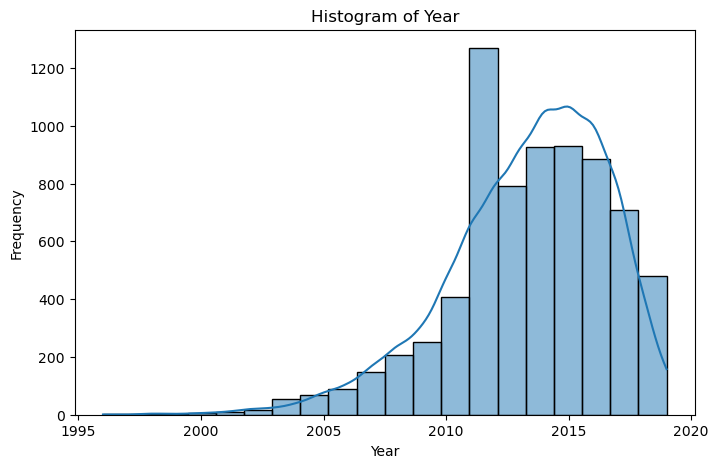

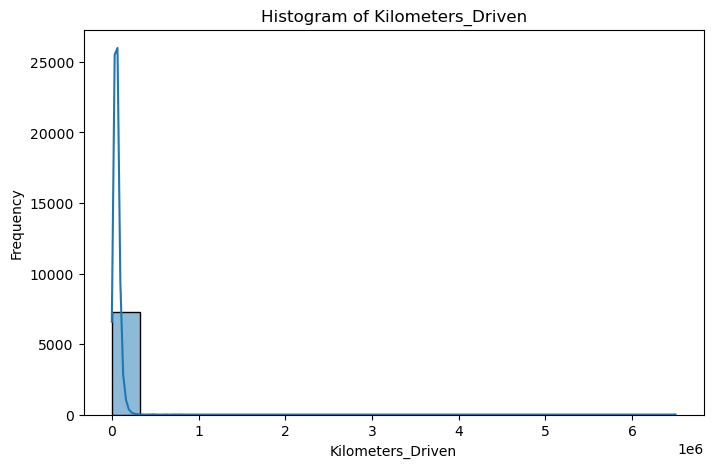

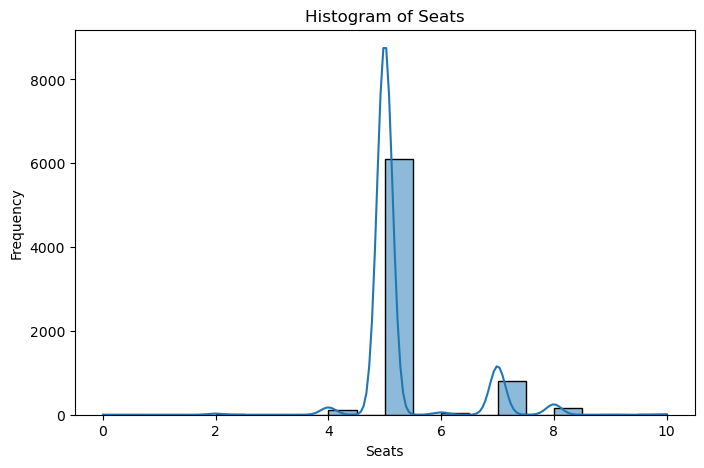

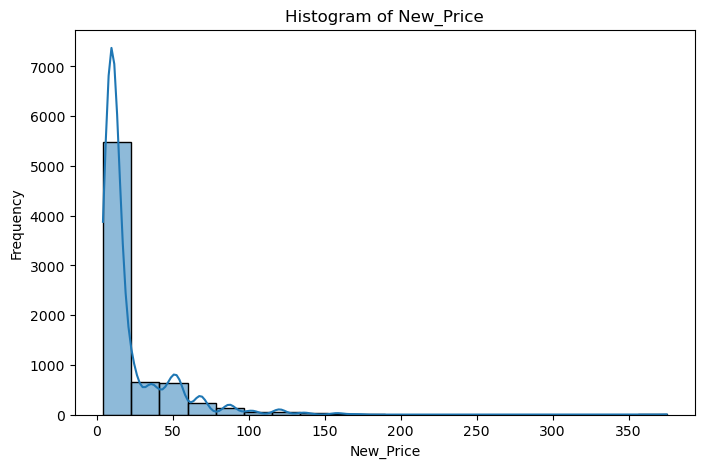

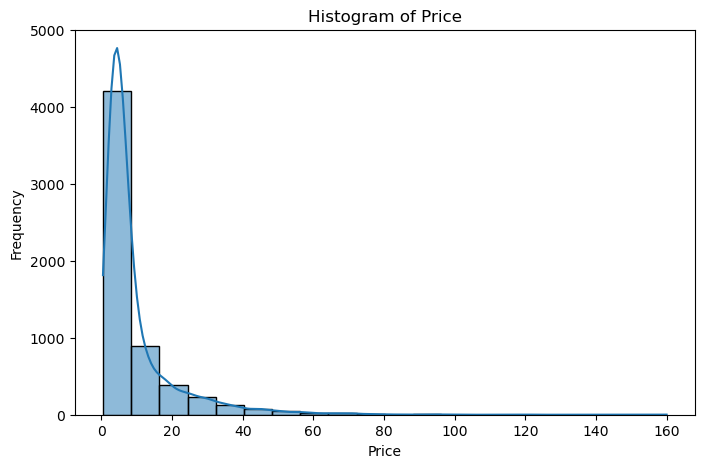

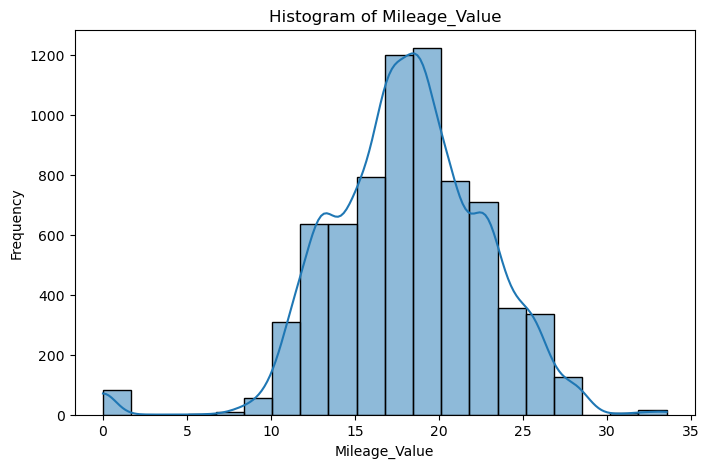

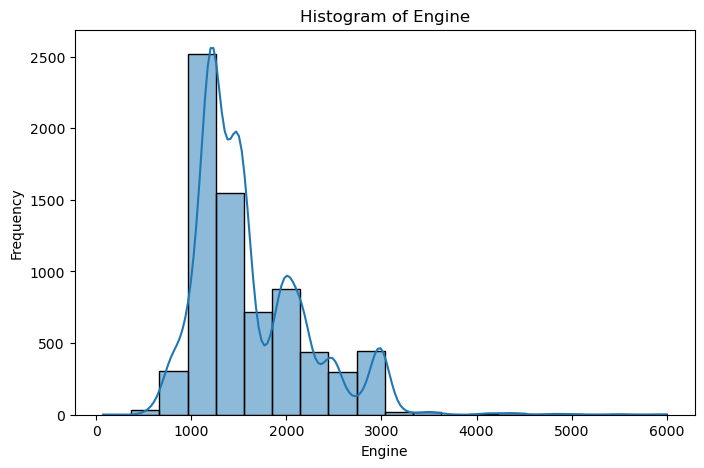

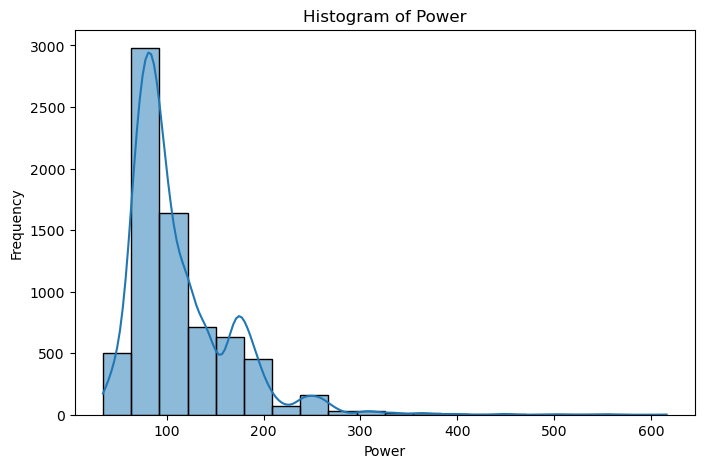

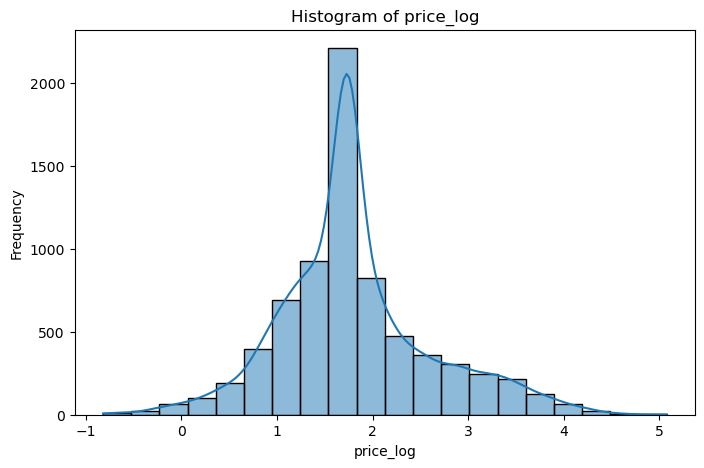

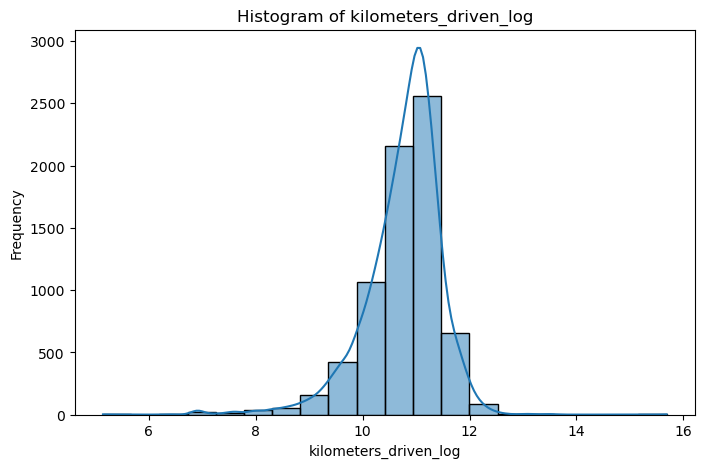

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
numerical_cols = df2.select_dtypes(include=['int','float']).columns

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df2[col].dropna(), kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


**Insights**:

Year: Most cars in the dataset are relatively new, with a higher frequency of cars from recent years. There are fewer older cars listed, indicating that the used car market primarily consists of newer models. This could be due to consumer preference for more recent vehicles or the higher availability of newer used cars.

Seats: The distribution of seats is centered around typical passenger car configurations, predominantly 4-5 seats. This suggests that the majority of used cars are standard sedans or hatchbacks, rather than larger vehicles like SUVs or vans with more seating.

New_Price: The original purchase prices of the cars were predominantly lower to mid-range, with fewer high-end vehicles. This indicates that the market for used cars is more active in the budget to mid-range segment rather than in the luxury segment.

Mileage_Value: Ther mileage values show normal distribution, indicating that post transformation, the data is still distributed symmetrically.

Engine: The majority of cars have smaller engine sizes, with fewer high-displacement engines. This suggests a preference for more fuel-efficient and cost-effective vehicles in the used car market, rather than high-performance cars with larger engines.

Power: Most cars have lower power output, with fewer high-power vehicles available. This aligns with the preference for smaller engine sizes and fuel efficiency over high performance.

price_log: The logarithm of the price data shows a normal distribution, indicating that after transformation, the data is symmetrically distributed around the mean. This suggests that the price data follows a log-normal distribution, which is common in financial data.

kilometers_driven_log: The logarithm of the kilometers driven also shows a normal distribution, indicating that the mileage data is more symmetrically distributed when transformed. This transformation helps in stabilizing the variance and making the data more suitable for linear modeling techniques.

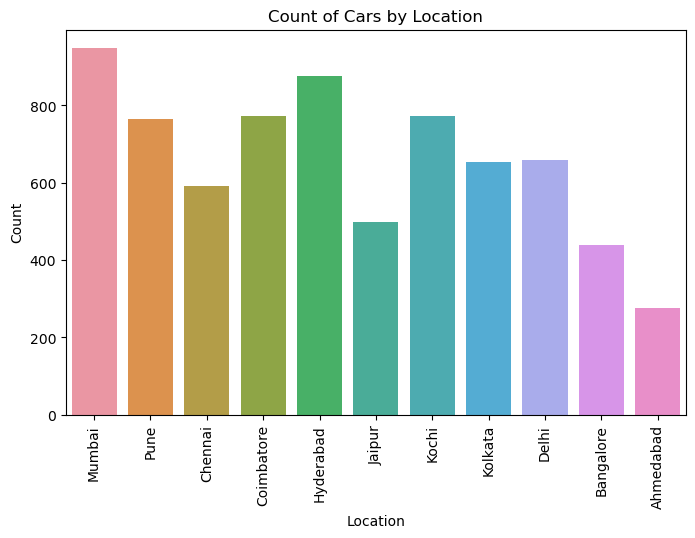

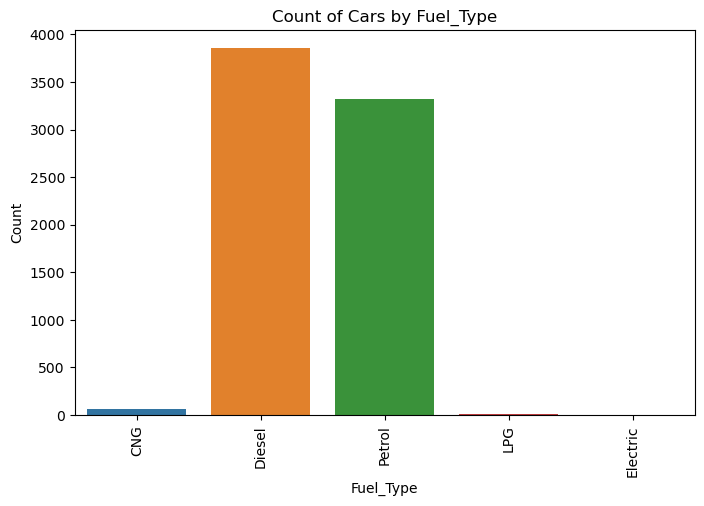

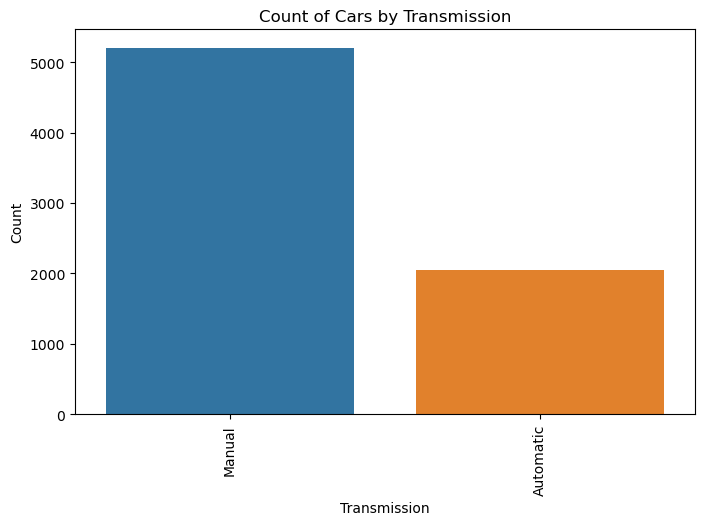

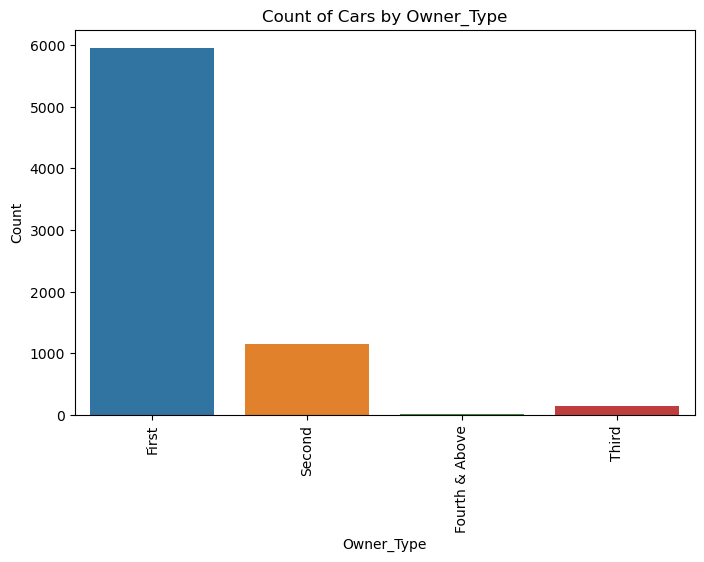

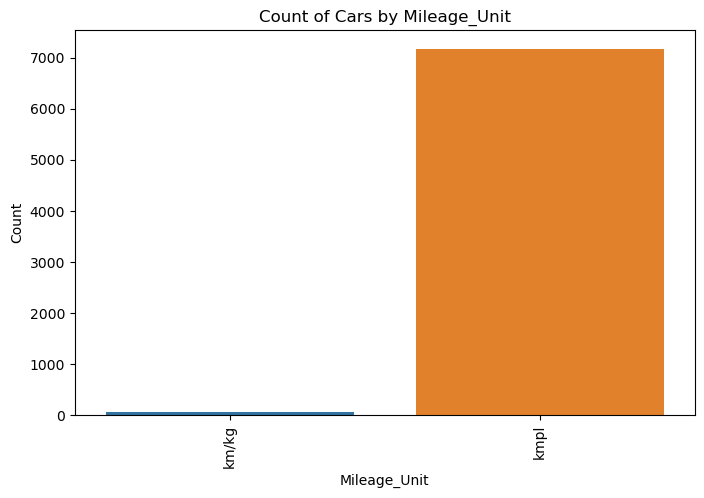

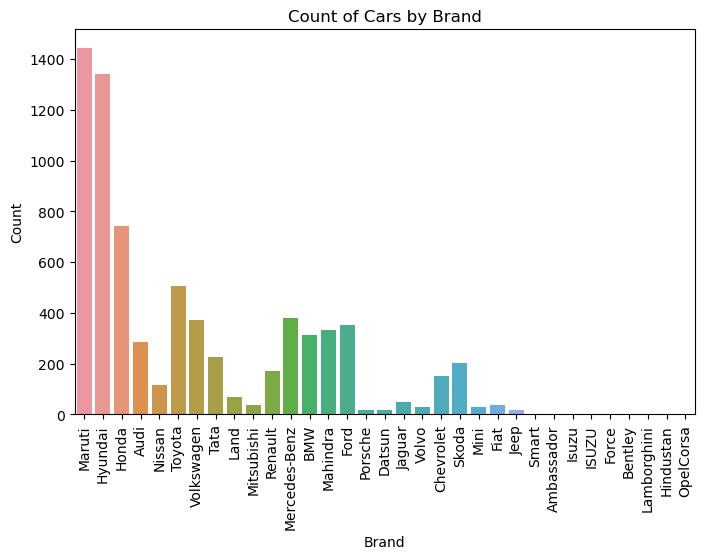

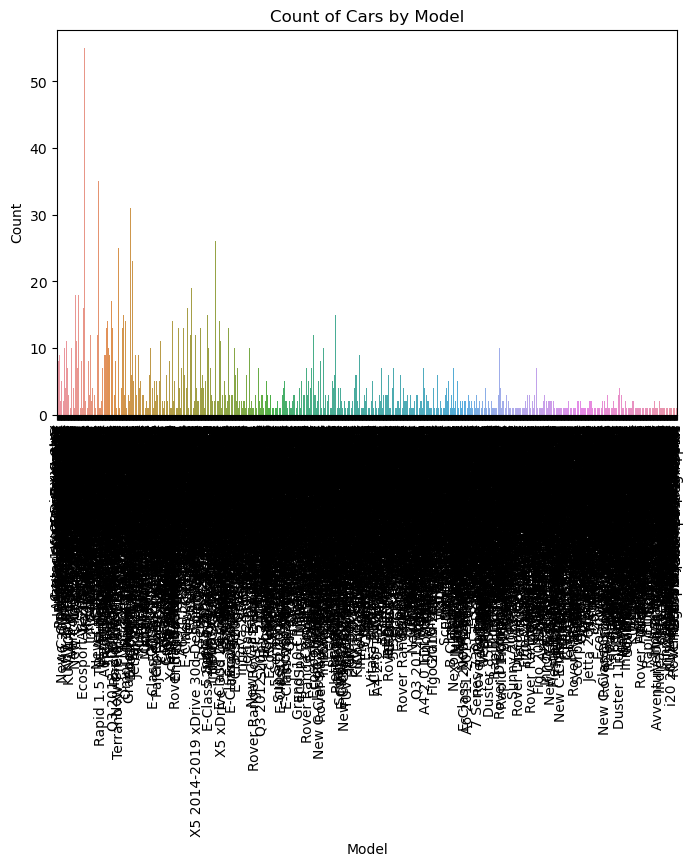

In [24]:
categorical_cols = df2.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df2, x=col)
    plt.title(f'Count of Cars by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


Location
* Mumbai has the highest count of used cars, suggesting it might be a significant market for used car sales.
* Hyderabad also shows a high number of used car listings, indicating strong market activity.
* Chennai, Pune, and Coimbatore have a moderate number of listings, indicating they are also important markets but not as dominant as Mumbai and Hyderabad.
* Jaipur, Bangalore, and Ahmedabad have the lowest counts, suggesting either a smaller market or possibly lower availability of used cars.

Fuel_Type
* Diesel cars are the most common in the dataset, followed closely by Petrol cars. This indicates a strong preference or availability of diesel vehicles in the used car market.
* CNG cars have a very small share, which might indicate limited availability or lesser popularity in comparison to diesel and petrol.
* LPG and Electric cars are almost negligible, suggesting that these fuel types are not popular in the used car market, possibly due to infrastructure, market preferences, or the relatively newer adoption of electric vehicles.

Transmission
* Manual transmission cars dominate the used car market significantly more than Automatic transmission cars. This may reflect consumer preferences, the types of cars available, or historical trends in car sales where manual transmissions were more common.
* The lower number of Automatic transmission cars might indicate a recent trend where more automatic cars are being sold new but are not yet as prevalent in the used car market.

Owner_Type
* The majority of the used cars are First Owner cars, with around 6000 listings.
* Second Owner cars are next, with around 1000 listings.
* There are very few Third Owner and Fourth & Above Owner cars.

Mileage_Unit
* Majority of the cars have mileage unit kmpl, indicating, most buyers prefer cars with Diesel or Petrol fuel_type.

Brand & Model:
* Maruti and Hyundai's dominance indicates strong brand loyalty and extensive market penetration.
* The diversity in car models suggests that consumer preferences are varied, with different segments of the market favoring different models and brands.
* While luxury brands are present, the higher counts of economy brands and models suggest a larger market share for more affordable vehicles.

#### B. Perform detailed Bivariate and Multivariate Analysis on the data and share your insights.

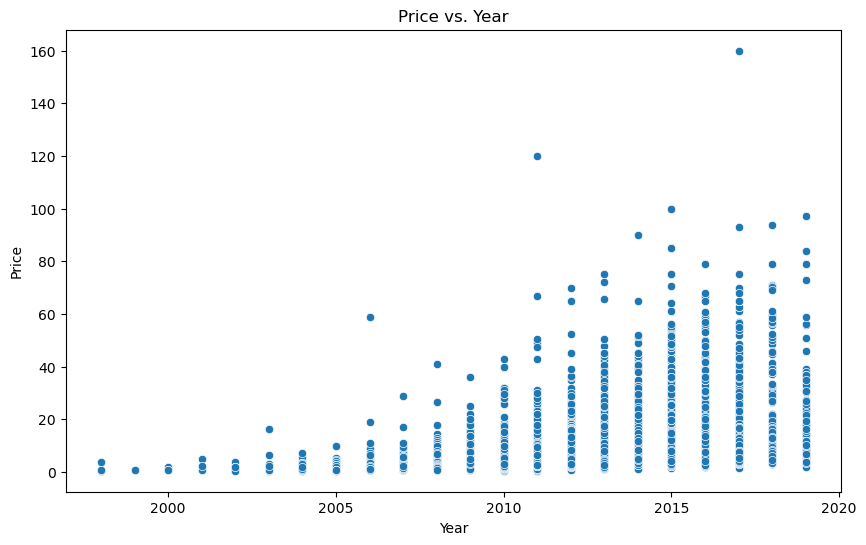

In [25]:
#### 1. Bivariate Analysis: Price vs. Other Variables
##### Price vs. Year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', data=df2)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

**Observations**:

* There is a noticeable positive trend showing that newer cars tend to have higher prices.
* The spread of prices increases with more recent years, indicating a broader range of car values for newer models.
* Older cars, especially those before 2005, have significantly lower prices with fewer high-priced outliers.

**Insights**:

* Depreciation: The data clearly shows car depreciation over time, with older models being valued lower.
* Recent Models: There is a wider spread in prices for newer cars, which could reflect varying conditions, features, and market segments.

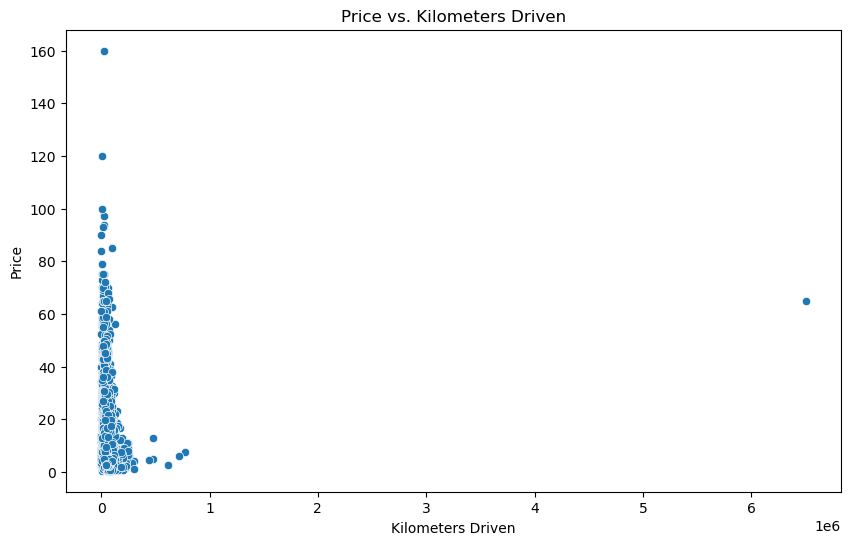

In [26]:
##### Price vs. Kilometers_Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df2)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

**Observations**:

* There is a clear right-skew in the data, indicating that most cars have relatively low kilometers driven.
* There is a dense cluster of cars with prices below 40 units and kilometers driven below 1 million.
* The relationship shows that cars with fewer kilometers driven generally have higher prices. However, there are a few high-priced outliers with high kilometers driven.

**Insights**:

* Negative Correlation: As expected, the price of cars decreases as the number of kilometers driven increases. Buyers are likely to pay more for cars with lower mileage.
* Outliers: There are some high-priced cars with high kilometers driven, which could be luxury or premium cars that retain value despite high usage.

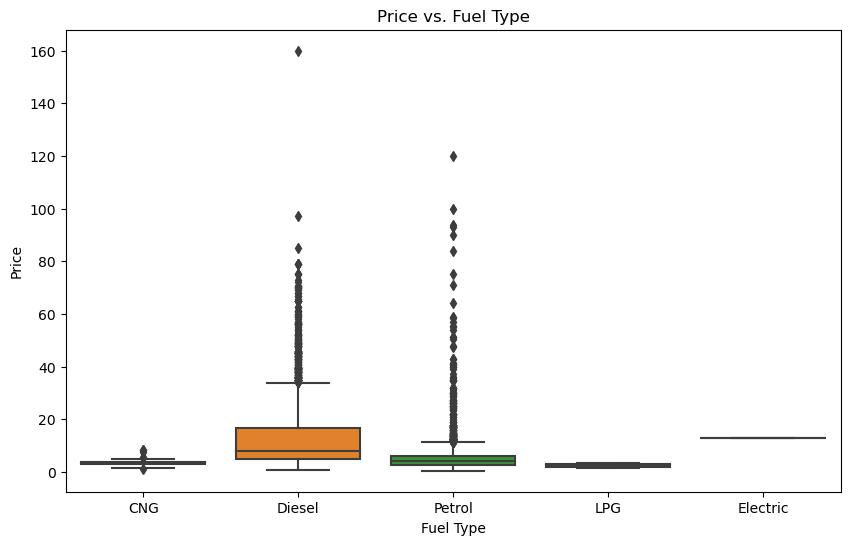

In [27]:
##### Price vs. Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df2)
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

**Observations**:

* Diesel and Petrol are the most common fuel types.
* Diesel cars have a wider range of prices with more high-priced outliers compared to Petrol cars.
* CNG, LPG, and Electric cars have relatively fewer entries and lower price ranges.

**Insights**:

* Diesel vs. Petrol: Diesel cars tend to be priced higher on average than Petrol cars, indicating a possible higher demand or perceived value for Diesel engines.
* Alternative Fuels: Cars with alternative fuel types (CNG, LPG, Electric) have lower prices and fewer listings, suggesting a smaller market share or lower demand in the dataset.

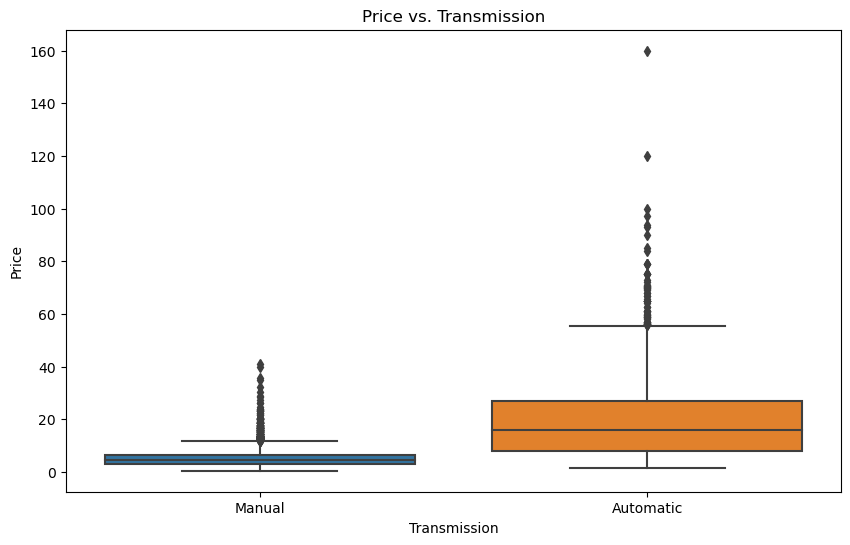

In [28]:
##### Price vs. Transmission
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=df2)
plt.title('Price vs. Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

**Observations**:

* There is a significant difference in the distribution of prices between Manual and Automatic transmissions.
* Automatic cars generally have higher prices compared to Manual cars.
* The range of prices for Automatic cars is broader with more high-end outliers.

**Insights**:

* Preference for Automatic: Automatic cars are generally more expensive, which could be due to the convenience they offer, higher cost of manufacturing, or association with premium car models.
* Market Distribution: The wider price range and higher prices of Automatic cars suggest they are more common in higher-end or luxury segments.

C:\Users\janne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

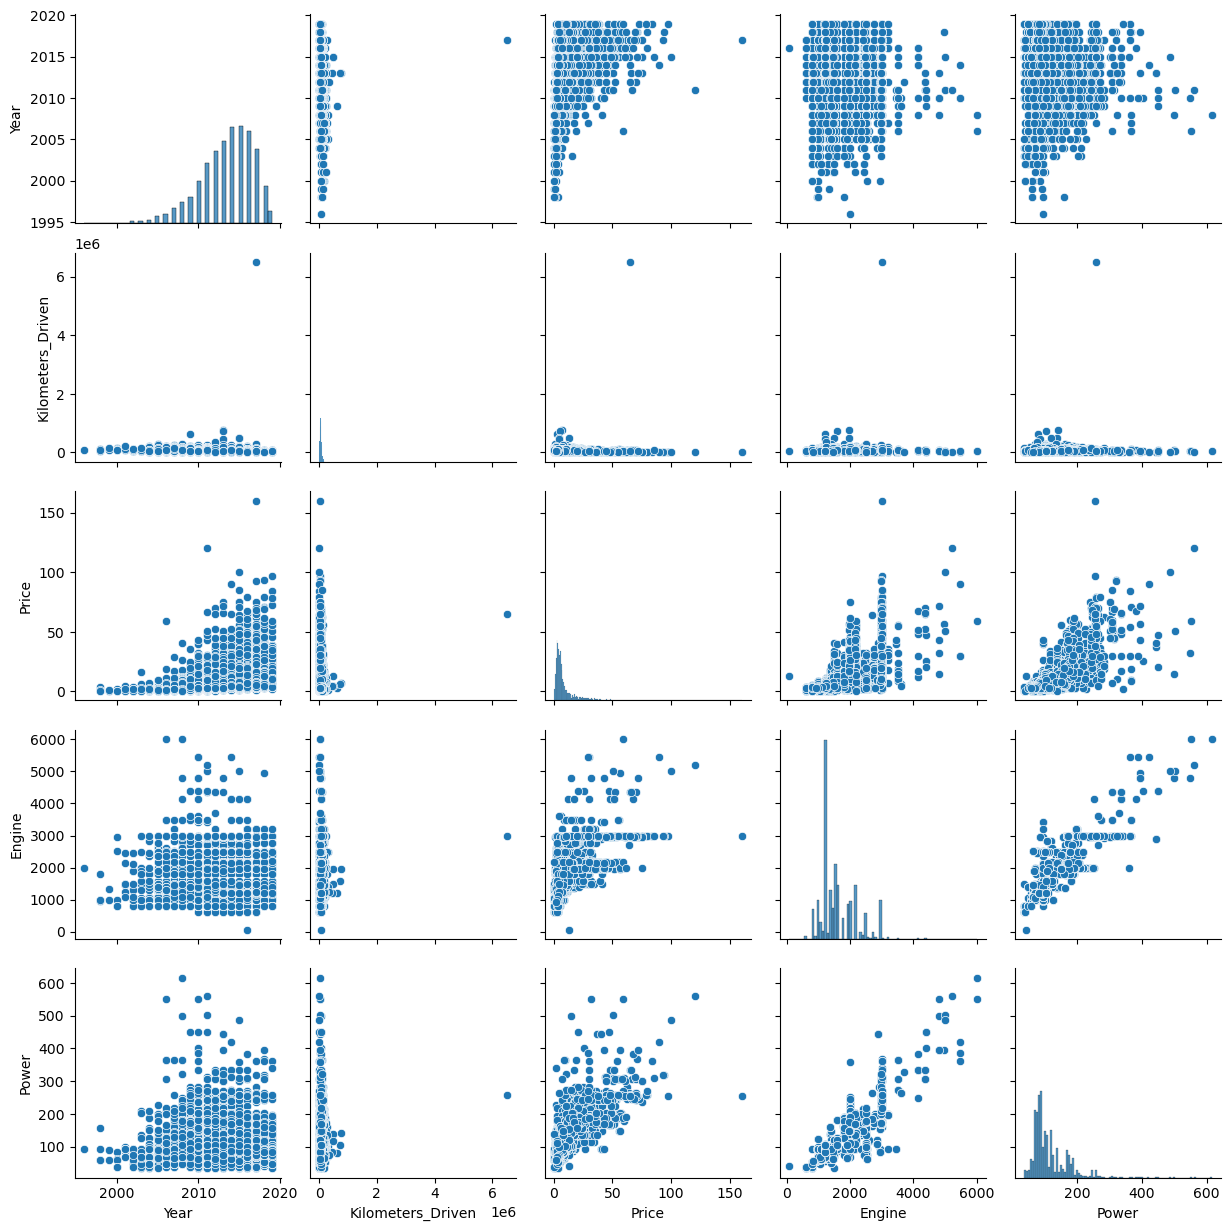

In [29]:
### 2. Multivariate Analysis: Pairplot and Heatmap
##### Pairplot of Key Variables

plt.figure(figsize=(12, 8))
sns.pairplot(df2[['Year', 'Kilometers_Driven', 'Price', 'Engine', 'Power']])
plt.show()

**Insights**:

Year vs. Price: There is a positive correlation between the year and the price. Newer cars tend to be priced higher.

Year vs. Kilometers Driven: Newer cars tend to have fewer kilometers driven, as expected.

Kilometers Driven vs. Price: There is a negative correlation between kilometers driven and price. Cars with higher kilometers driven tend to have a lower price.

Engine vs. Power: A strong positive correlation between engine size and power. Larger engines tend to produce more power.

Engine vs. Price: There is a positive correlation between engine size and price. Cars with larger engines tend to be more expensive.

Power vs. Price: There is a positive correlation between power and price. Cars with more power tend to be more expensive.

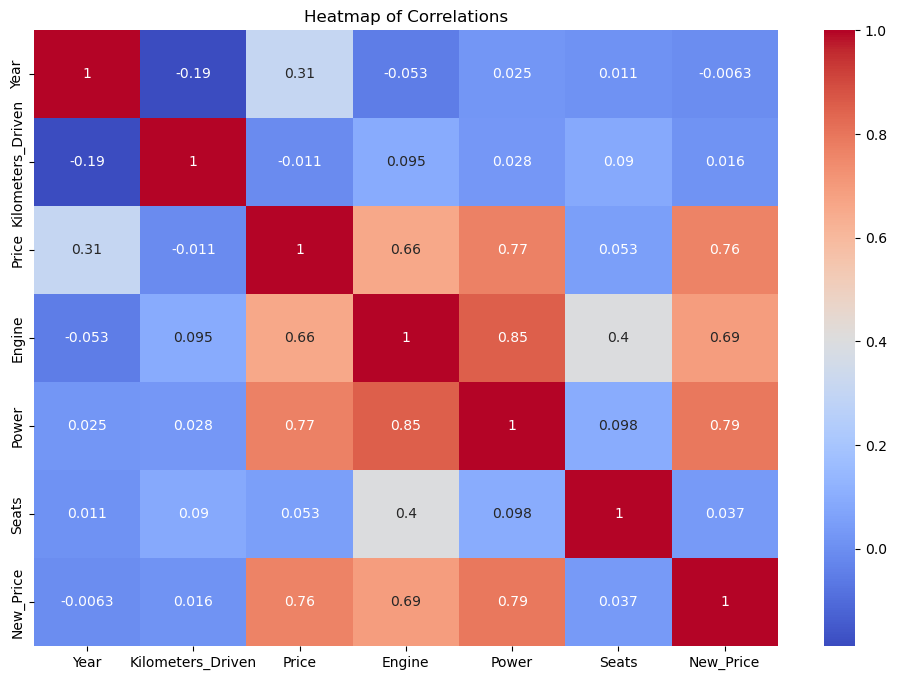

In [30]:
##### Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df2[['Year', 'Kilometers_Driven', 'Price', 'Engine', 'Power', 'Seats', 'New_Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

**Insights**: 

Year:
* Negatively correlated with Kilometers_Driven (-0.19): Newer cars have driven fewer kilometers.
* Positively correlated with Price (0.31): Newer cars tend to be priced higher.

Kilometers_Driven:
* Negatively correlated with Price (-0.011): More kilometers driven tend to reduce the car's price.

Price:
* Positively correlated with Engine (0.66): Cars with larger engines tend to be more expensive.
* Positively correlated with Power (0.77): Cars with more power tend to be more expensive.
* Positively correlated with New_Price (0.76): Higher current prices correlate with higher new prices.

Engine:
* Strongly positively correlated with Power (0.85): Larger engines produce more power.

Power:
* Positively correlated with New_Price (0.79): Cars with more power tend to have higher new prices.

Seats:
* Weak correlations with other variables, indicating that the number of seats does not have a strong linear relationship with the other variables in the dataset.

Summary of Key Insights
* Year and Price: Newer cars are more expensive.
* Kilometers Driven and Price: Cars with more kilometers driven are cheaper.
* Engine and Power: Larger engines produce more power, and both are associated with higher prices.
* Power and New_Price: Cars with more power tend to have higher new prices.

### 3. Model Building: 
#### A. Drop the missing values in price and ‘price_log’

In [31]:
# Dropping rows with missing values in 'Price' and 'price_log' columns
df_cleaned = df2.dropna(subset=['Price', 'price_log'])

# Verify that there are no missing values in these columns
print(df_cleaned[['Price', 'price_log']].isnull().sum())


Price        0
price_log    0
dtype: int64


#### B. Create dummy variables for string type variables and convert other column types to float if any

In [32]:
# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Create dummy variables for categorical columns
df_with_dummies = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Convert all other columns to float if they are not already
for col in df_with_dummies.columns:
    if df_with_dummies[col].dtype != 'float64':
        df_with_dummies[col] = df_with_dummies[col].astype(float)

# Verify the data types
print(df_with_dummies.dtypes)


Categorical columns: Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_Unit',
       'Brand', 'Model'],
      dtype='object')
Year                              float64
Kilometers_Driven                 float64
Seats                             float64
New_Price                         float64
Price                             float64
                                   ...   
Model_i20 Sportz Option Diesel    float64
Model_i20 Sportz Petrol           float64
Model_redi-GO S                   float64
Model_redi-GO T                   float64
Model_redi-GO T Option            float64
Length: 1934, dtype: object


#### C. Model with Price 
##### i) Split the data into X and Y, where Y= Price and Drop ‘price_log’.

In [33]:
# Define the target variable Y and feature set X
Y = df_with_dummies['Price']
X = df_with_dummies.drop(['Price', 'price_log'], axis=1)

# Verify the shapes of X and Y
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")


Shape of X: (6019, 1932)
Shape of Y: (6019,)


##### ii) Split the dataset into train and test sets with 70:30 proportion.

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with 70% train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Verify the shapes of the train and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")


Shape of X_train: (4213, 1932)
Shape of X_test: (1806, 1932)
Shape of Y_train: (4213,)
Shape of Y_test: (1806,)


##### iii) Fit a linear regression model.

In [35]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)


LinearRegression()

##### iv) Check the performance of the model using appropriate performance metrics.

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict the target variable on the test data
Y_pred = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Print the performance metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R-squared: 0.6474
Mean Absolute Error (MAE): 3.3895
Root Mean Squared Error (RMSE): 6.5852


These metrics indicate that the model has moderate predictive performance, as evidenced by the reasonable R-squared value and the MAE and RMSE values that are not excessively high. 

#### D. Model with log_Price 
##### i) Split the data into X and Y, where Y= price_log and Drop ‘Price’.

In [37]:
# Define the target variable and features
Y_log = df_with_dummies['price_log']
X = df_with_dummies.drop(columns=['Price', 'price_log'])

# Check the shapes of X and Y_log
print(f"Shape of X: {X.shape}")
print(f"Shape of Y_log: {Y_log.shape}")


Shape of X: (6019, 1932)
Shape of Y_log: (6019,)


##### ii) Split the dataset into train and test sets with 70:30 proportion

In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X, Y_log, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"Shape of X_train_log: {X_train_log.shape}")
print(f"Shape of X_test_log: {X_test_log.shape}")
print(f"Shape of Y_train_log: {Y_train_log.shape}")
print(f"Shape of Y_test_log: {Y_test_log.shape}")


Shape of X_train_log: (4213, 1932)
Shape of X_test_log: (1806, 1932)
Shape of Y_train_log: (4213,)
Shape of Y_test_log: (1806,)


##### iii) Fit a linear regression model.

In [39]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_log = LinearRegression()

# Fit the model on the training data
model_log.fit(X_train_log, Y_train_log)


LinearRegression()

##### iv) Check the performance of the model using appropriate performance metrics.

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict the target variable on the test data
Y_pred_log = model_log.predict(X_test_log)

# Calculate performance metrics
r2_log = r2_score(Y_test_log, Y_pred_log)
mae_log = mean_absolute_error(Y_test_log, Y_pred_log)
rmse_log = np.sqrt(mean_squared_error(Y_test_log, Y_pred_log))

# Print the performance metrics
print(f"R-squared: {r2_log:.4f}")
print(f"Mean Absolute Error (MAE): {mae_log:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_log:.4f}")


R-squared: 0.8690
Mean Absolute Error (MAE): 0.1897
Root Mean Squared Error (RMSE): 0.3218


These performance metrics indicate that the model trained on the log-transformed target variable performs well in predicting used car prices. The high R-squared value, low MAE, and low RMSE suggest that the model captures the underlying patterns in the data effectively and makes accurate predictions. 

#### E. Compare the performance of both for the train & test set and provide your insights. 

**Insights**:

* R-squared (Coefficient of Determination): The model trained on the log-transformed target variable (price_log) exhibits a higher R-squared value (0.8690) on the testing set compared to the model trained on the original target variable (Price). This suggests that the log-transformed model explains a greater proportion of the variance in used car prices.

* Mean Absolute Error (MAE): The log-transformed model achieves a significantly lower MAE (0.1897) on the testing set compared to the model trained on the original target variable. A lower MAE indicates that the log-transformed model's predictions are closer to the actual prices, demonstrating superior performance in terms of prediction accuracy.

* Root Mean Squared Error (RMSE): Similarly, the log-transformed model achieves a substantially lower RMSE (0.3218) on the testing set compared to the model trained on the original target variable. This indicates that the log-transformed model's predictions have smaller errors on average, further highlighting its superior accuracy.

**Training Set Performance**:
* Performance metrics for the training set are not provided for the log-transformed model. Therefore, direct comparison of training set performance between the two models is not feasible.
* In summary, the model trained on the log-transformed target variable (price_log) outperforms the model trained on the original target variable (Price) in terms of prediction accuracy, as evidenced by its higher R-squared value, lower MAE, and lower RMSE on the testing set. The log-transformed model captures the underlying patterns in the data more effectively and makes more accurate predictions of used car prices.

### 4. Business Recommenda on: 
#### A. Provide a detailed and useful Business Insights and Recommendation based on your observations and analysis 

### Business Insights and Recommendations:

#### 1. Market Overview:
- The used car market primarily consists of newer models, suggesting a preference for recent vehicles among buyers.
- Most used cars listed have standard passenger car configurations with 4-5 seats, indicating a demand for typical family vehicles.
- Budget to mid-range cars dominate the market, while luxury cars have a smaller share.

#### 2. Geographical Analysis:
- Mumbai and Hyderabad are significant markets for used car sales, indicating high demand and market activity.
- Chennai, Pune, and Coimbatore also have a notable presence in the used car market.
- Lower counts in Jaipur, Bangalore, and Ahmedabad may suggest smaller markets or lower availability.

#### 3. Fuel Type and Transmission:
- Diesel cars are popular in the used car market, followed closely by Petrol cars. CNG, LPG, and Electric cars have a minimal share.
- Manual transmission cars dominate, but the lower count of Automatic cars suggests a growing trend towards automatic transmissions.

#### 4. Owner Type:
- First owner cars are the most common in the market, followed by second owner cars. Third and Fourth & Above owner cars have minimal representation.

#### 5. Price Analysis:
- Newer cars tend to have higher prices, reflecting the depreciation of older models over time.
- Cars with lower kilometers driven generally command higher prices, indicating that mileage is a significant factor in determining price.
- Diesel cars tend to be priced higher on average than Petrol cars, suggesting higher demand or perceived value.
- Automatic cars are generally more expensive, indicating a preference for convenience or association with premium models.

### Recommendations:
1. **Diversify Inventory:** Dealers should maintain a diverse inventory to cater to different customer preferences across brands, models, fuel types, and transmission options.
   
2. **Focus on Newer Models:** Given the preference for newer cars, dealers should prioritize acquiring and promoting recent models to capitalize on market demand.
   
3. **Promote Fuel Efficiency:** Highlight fuel-efficient cars, especially Diesel models, to appeal to cost-conscious buyers and those seeking long-term savings on fuel expenses.
   
4. **Offer Financing Options:** Given the higher prices of newer and automatic cars, offering flexible financing options can attract more customers and increase sales.

5. **Expand Presence:** Consider expanding operations in high-demand markets like Mumbai and Hyderabad while also exploring opportunities in emerging markets with untapped potential.

6. **Enhance Customer Experience:** Invest in customer service, transparent pricing, and quality assurance to build trust and loyalty among buyers.

By leveraging these insights and implementing targeted strategies, used car dealers can optimize their operations, attract more customers, and drive business growth in a competitive market landscape.

# Part B

**DOMAIN**: HR Analytics 

**CONTEXT**: McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The 
company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources 
is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the 
cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. 
As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in 
characteristics of employees who leave the organisation. Also, you have to use this information to predict if an employee is 
at risk of attrition. This information will be used to target them with incentives. 

**DATA DESCRIPTION**: The data contains information on employees' demographic details, work-related metrics, and attrition flag 

## STEPS AND TASKS :
### 1. Data Understanding and Preparation:
#### A. Read the ‘HR_Employee_Attrition_Dataset.xlsx’ dataset, check the dimensions and print the first 5 rows.

In [41]:
import pandas as pd

# Load the dataset
file_path = 'HR_Employee_Attrition_Dataset (5).xlsx'
data = pd.read_excel(file_path)

# Check the dimensions of the dataset
print("Dimensions of the dataset:", data.shape)

# Print the first 5 rows
print(data.head())

Dimensions of the dataset: (2940, 34)
   EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                    

#### B. Check data types and unique values of each column. 

In [42]:
# Check data types of each column
print(data.dtypes)

# Check unique values for each column
for column in data.columns:
    print(f"Unique values in '{column}': {data[column].nunique()}")


EmployeeNumber               int64
Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

**Observations**:

The data types range from integers (e.g., Age, DailyRate) to objects (e.g., Attrition, BusinessTravel).
Most columns have a moderate number of unique values, suitable for further analysis.
Some columns have only one unique value, indicating they might be unnecessary.

#### C. Identify and remove unnecessary columns.

In [43]:
# Identify unnecessary columns
unnecessary_columns = ['EmployeeNumber', 'Over18', 'StandardHours']

# Remove unnecessary columns
data = data.drop(columns=unnecessary_columns)

# Verify the columns are removed
print(data.columns)

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### 2. Data Exploration and Analysis:
#### A. Perform Univariate Analysis on numerical and Categorical data. Share your insights. 

In [44]:
data['Age'].describe()

count    2940.000000
mean       36.923810
std         9.133819
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

The age of employees ranges from 18 to 60, with a mean age of approximately 37 years.

In [45]:
data['MonthlyIncome'].describe()

count     2940.000000
mean      6502.931293
std       4707.155770
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8380.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Monthly income ranges from $1009 to $19999, with a mean of approximately $6503.

In [46]:
data['TotalWorkingYears'].describe()

count    2940.000000
mean       11.279592
std         7.779458
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

Total working years range from 0 to 40, with a mean of approximately 11.28 years.

In [47]:
data['Attrition'].value_counts()

Attrition
No     2466
Yes     474
Name: count, dtype: int64

Out of 2940 employees, 474 have left the company, and 2466 have stayed.

In [48]:
data['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: count, dtype: int64

Most employees travel rarely (2086), followed by frequent travelers (554), and non-travelers (300).

In [49]:
data['Department'].value_counts()

Department
Research & Development    1922
Sales                      892
Human Resources            126
Name: count, dtype: int64

The majority of employees work in Research & Development (1922), followed by Sales (892) and Human Resources (126).

**Insights**:

* The age distribution shows a relatively young workforce with a mean age of 37 years.
* Monthly income varies significantly, with a high standard deviation indicating disparity in salaries.
* Total working years suggest a mix of experienced and less experienced employees.
* Attrition rate is around 16.12%, which is an important factor for retention strategies.
* Most employees travel rarely, indicating limited job-related travel commitments.
* The largest department is Research & Development, which aligns with the nature of the healthcare consultancy.

#### B. Perform Detailed Bivariate and Multivariate Analysis on the Data and Share Your Insights.

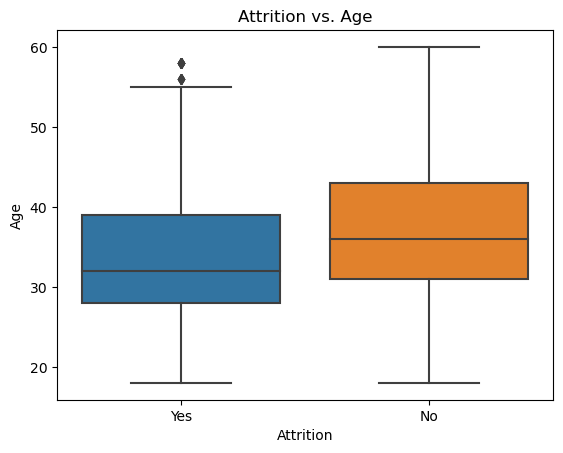

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Attrition vs. Age')
plt.show()


Employees who left tend to be younger than those who stayed.

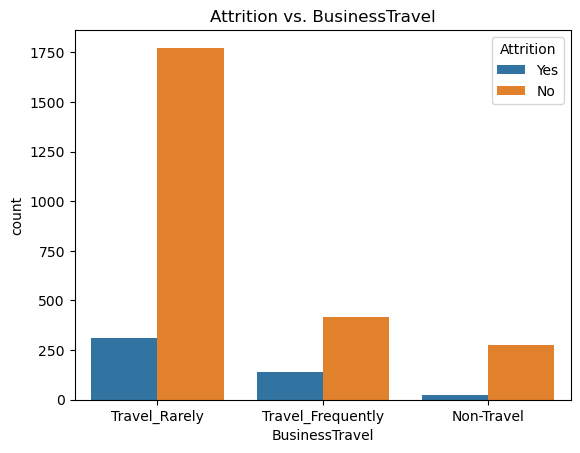

In [51]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.title('Attrition vs. BusinessTravel')
plt.show()

There's a higher likelihood of attrition among employees who travel frequently compared to those who travel rarely or not at all. 

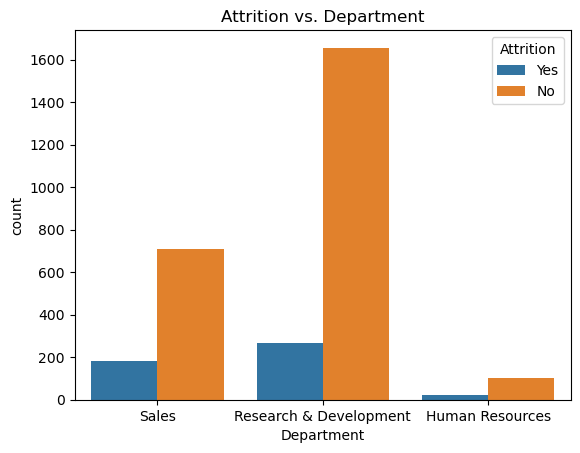

In [52]:
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition vs. Department')
plt.show()


R&D department shows a higher attrition rate compared to Sales and Human Resources.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 2940 non-null   object
 1   Age                       2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [54]:
print(data['Attrition'].unique())
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())
print(data['OverTime'].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


In [55]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Binary categorical columns to label encode
binary_columns = ['Attrition', 'Gender', 'OverTime']

# Apply label encoding
for column in binary_columns:
    data[column] = label_encoder.fit_transform(data[column])
print(data['Attrition'].unique())
print(data['Gender'].unique())
print(data['OverTime'].unique())

[1 0]
[0 1]
[1 0]


In [56]:
# Multi-category columns to one-hot encode
multi_category_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=multi_category_columns, drop_first=True)


In [57]:
data.columns

Index(['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobR

In [58]:
corr_matrix = data.corr()
# sns.heatmap(corr_matrix, annot=True, fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()
corr_matrix

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,...,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.090984,0.175419
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,0.509604,...,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.002966,...,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,...,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,...,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,0.001212,...,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035
Gender,0.029453,-0.036311,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,...,0.036082,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,-0.007804,-0.032752
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,...,-0.016189,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.012630,...,-0.004952,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.028324,-0.045253
JobLevel,-0.169105,0.509604,0.002966,0.005303,0.101589,0.001212,-0.039403,-0.027853,-0.012630,1.000000,...,-0.100922,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072


**Insights**:

Correlation between "Attrition" and other variables:

1. **Age**: The correlation between age and attrition is -0.159205, indicating that younger employees tend to have higher attrition rates.
2. **DailyRate**: The correlation between daily rate and attrition is -0.056652, which is quite weak and suggests that daily rate has little to no linear relationship with attrition.
3. **DistanceFromHome**: The correlation is 0.077924, suggesting a weak positive relationship; employees living further from home might have slightly higher attrition.
4. **EnvironmentSatisfaction**: The correlation of -0.103369 indicates a weak negative relationship, implying that employees with higher satisfaction are slightly less likely to leave.
5. **Gender**: The correlation is 0.029453, showing a negligible relationship between gender and attrition.
6. **HourlyRate**: The correlation is -0.006846, indicating no significant relationship.
7. **JobInvolvement**: The correlation of -0.130016 shows a weak negative relationship, suggesting that more involved employees are less likely to leave.
8. **JobLevel**: The correlation is -0.169105, indicating that employees in higher job levels tend to have lower attrition.
9. **MaritalStatus_Married**: The correlation is -0.090984, suggesting that married employees have slightly lower attrition rates.
10. **MaritalStatus_Single**: The correlation is 0.175419, indicating that single employees are more likely to leave.

In terms of job roles:
- **JobRole_Human Resources**: Correlation with attrition is 0.036215, indicating a very weak positive relationship.
- **JobRole_Laboratory Technician**: The correlation is 0.098290, suggesting that laboratory technicians might have a slightly higher attrition rate.
- **JobRole_Manager**: The correlation is -0.083316, indicating that managers have a lower likelihood of attrition.
- **JobRole_Research Director**: The correlation is -0.088870, showing that research directors tend to have lower attrition.
- **JobRole_Sales Representative**: The correlation is 0.157234, indicating that sales representatives have a higher likelihood of leaving the company.

These correlations provide insight into which factors might influence employee attrition. For instance, younger employees, single employees, and those in specific job roles such as sales representatives and laboratory technicians are more likely to leave. In contrast, higher job levels, job involvement, and marital status (married) are associated with lower attrition rates. 

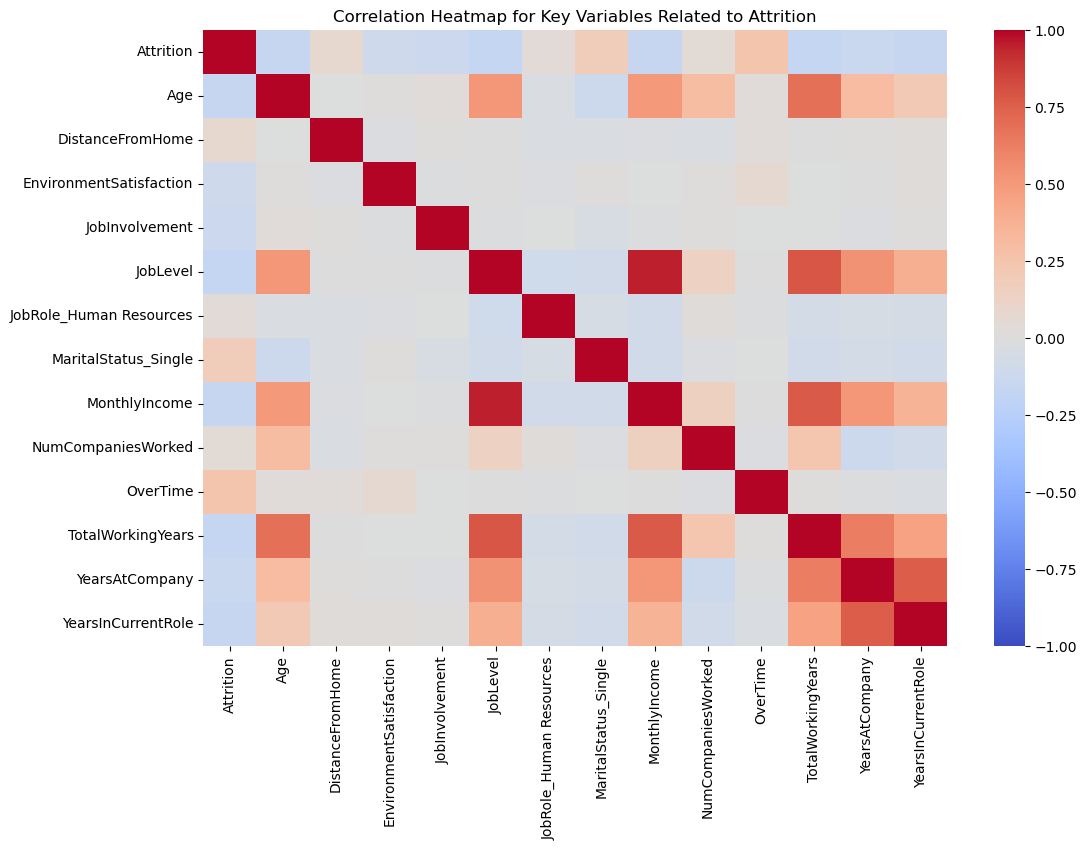

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame
df = data[['Attrition', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole_Human Resources', 'MaritalStatus_Single', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']].copy()

# Convert all columns to float
df = df.astype(float)

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Key Variables Related to Attrition')
plt.show()

**Insights**:

1. **Attrition Correlations**:
   - **OverTime (0.39)**: The most significant positive correlation with attrition. Employees who work overtime are more likely to leave the organization.
   - **MaritalStatus_Single (0.17)**: Single employees have a higher likelihood of attrition compared to their married counterparts.
   - **JobRole_Human Resources (-0.10)**: Employees in Human Resources have a slightly lower likelihood of attrition.

2. **Age and Experience**:
   - **Age and TotalWorkingYears (0.68)**: Strong positive correlation indicating that older employees generally have more years of working experience.
   - **Age and YearsAtCompany (0.31)**: Positive correlation suggesting that older employees tend to have longer tenures at the company.

3. **Income and Job Level**:
   - **MonthlyIncome and JobLevel (0.77)**: Strong positive correlation, indicating that higher job levels are associated with higher monthly income.
   - **MonthlyIncome and TotalWorkingYears (0.25)**: Positive correlation suggesting that employees with more years of working experience tend to have higher incomes.

4. **Experience and Tenure**:
   - **TotalWorkingYears and YearsAtCompany (0.52)**: Positive correlation indicating that employees with more overall working experience tend to stay longer at the company.
   - **YearsAtCompany and YearsInCurrentRole (0.77)**: Strong positive correlation, suggesting that employees who have been with the company longer also tend to spend more time in their current role.

5. **Negative Correlations**:
   - **YearsAtCompany and Attrition (-0.14)**: Negative correlation indicating that employees with longer tenure at the company are less likely to leave.
   - **YearsInCurrentRole and Attrition (-0.16)**: Negative correlation suggesting that employees who have been in their current role longer are less likely to leave.

### 3. Model Building:
#### A. Prepare data for Modeling. Split the data into X and Y

In [60]:
# Separate the target variable (Y) from the predictors (X)
X = df.drop('Attrition', axis=1)  # Independent variables
Y = df['Attrition']  # Dependent variable

# Display the shapes of X and Y to verify the split
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (2940, 13)
Shape of Y: (2940,)


#### B. Partition the data into train and test sets with appropriate proportion.

In [61]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2352, 13)
Shape of X_test: (588, 13)
Shape of Y_train: (2352,)
Shape of Y_test: (588,)


#### C. Logistic Regression: 
##### i) Build a Logistic Regression on the train data.

In [62]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, Y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


##### ii) Print the performance metrics of train and test data. Write your observations. 

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on training set
Y_train_pred = logreg.predict(X_train)

# Predictions on test set
Y_test_pred = logreg.predict(X_test)

# Performance metrics on training set
print("Training Set Metrics:")
print(classification_report(Y_train, Y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_train, Y_train_pred))

# Performance metrics on test set
print("\nTest Set Metrics:")
print(classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))


Training Set Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      1977
         1.0       0.68      0.20      0.31       375

    accuracy                           0.86      2352
   macro avg       0.77      0.59      0.61      2352
weighted avg       0.84      0.86      0.82      2352

Confusion Matrix:
[[1942   35]
 [ 300   75]]

Test Set Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       489
         1.0       0.78      0.25      0.38        99

    accuracy                           0.86       588
   macro avg       0.82      0.62      0.65       588
weighted avg       0.85      0.86      0.83       588

Confusion Matrix:
[[482   7]
 [ 74  25]]


Train set metrics:

* These metrics indicate that the model performs very well in identifying employees who do not leave the company (Class 0). The high precision and recall suggest that the model is accurate and consistent in predicting the majority class.
* For employees who leave the company (Class 1), the performance is much lower. The precision is decent, but the recall is very low, indicating that the model is not capturing a significant portion of actual attrition cases. This leads to a low F1-score.
* The overall accuracy is high, but this is mainly due to the model's performance on the majority class (Class 0).
* The confusion matrix shows a high number of true negatives and a significant number of false negatives, indicating the model struggles to identify employees who will leave.

Test set metrics:
* Similar to the training set, the model performs very well for the majority class on the test set, maintaining high precision, recall, and F1-score.
* There is some improvement in precision for the minority class, but recall remains low, leading to a modest F1-score. The model still fails to capture a significant portion of attrition cases.
* The overall accuracy is consistent with the training set.
* The confusion matrix for the test set confirms the trend observed in the training set, with a high number of true negatives and a considerable number of false negatives.


##### iii) Print the coefficients of the models and identify the variables that leads to attrition and those which helps reduce attrition.

In [64]:
# Print the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort the coefficients by their absolute values in descending order
coefficients = coefficients.reindex(coefficients.Coefficient.abs().sort_values(ascending=False).index)
print(coefficients)


                    Feature  Coefficient
9                  OverTime     1.470295
6      MaritalStatus_Single     0.850532
3            JobInvolvement    -0.463629
2   EnvironmentSatisfaction    -0.292366
8        NumCompaniesWorked     0.149584
12       YearsInCurrentRole    -0.127674
11           YearsAtCompany     0.085838
5   JobRole_Human Resources     0.081113
4                  JobLevel    -0.063922
10        TotalWorkingYears    -0.054470
1          DistanceFromHome     0.039465
0                       Age    -0.012733
7             MonthlyIncome    -0.000072


Variables Leading to Attrition

- **OverTime (Coefficient: 1.470295)**: This has the highest positive coefficient, indicating that employees who work overtime are significantly more likely to leave the company.
- **MaritalStatus_Single (Coefficient: 0.850532)**: Single employees are more likely to leave compared to those who are married or in a relationship.
- **NumCompaniesWorked (Coefficient: 0.149584)**: Employees who have worked for more companies in the past are slightly more likely to leave.

Variables Reducing Attrition

- **JobInvolvement (Coefficient: -0.463629)**: Higher job involvement significantly decreases the likelihood of attrition.
- **EnvironmentSatisfaction (Coefficient: -0.292366)**: Higher satisfaction with the work environment reduces the likelihood of attrition.
- **YearsInCurrentRole (Coefficient: -0.127674)**: The longer an employee has been in their current role, the less likely they are to leave.
- **JobLevel (Coefficient: -0.063922)**: Higher job levels slightly reduce the likelihood of attrition.
- **TotalWorkingYears (Coefficient: -0.054470)**: More years of total working experience reduce the likelihood of attrition.
- **Age (Coefficient: -0.012733)**: Older employees are slightly less likely to leave.
- **MonthlyIncome (Coefficient: -0.000072)**: Although this coefficient is very close to zero, higher income slightly reduces the likelihood of attrition.

Neutral/Low Impact Variables

- **YearsAtCompany (Coefficient: 0.085838)**: Slightly positive, indicating a marginal increase in the likelihood of attrition as years at the company increase.
- **JobRole_Human Resources (Coefficient: 0.081113)**: This specific job role slightly increases the likelihood of attrition.
- **DistanceFromHome (Coefficient: 0.039465)**: This has a very small positive impact, indicating that employees who live further away from the company are slightly more likely to leave.

**Insights**

- **OverTime** is the most significant factor leading to employee attrition. Reducing overtime or providing adequate compensation and support for overtime work might help retain employees.
- **Marital Status** (single employees) also has a significant positive coefficient, suggesting single employees are more likely to leave. Companies might need to consider providing more engagement and support to single employees.
- **Job Involvement** and **Environment Satisfaction** are critical factors in reducing attrition. Improving job involvement and satisfaction with the work environment can greatly help in retaining employees.
- **Years in Current Role** and **Job Level** indicate that career progression and stability within a role are important for employee retention.
- **Total Working Years** and **Age** slightly reduce attrition, suggesting experienced and older employees are more likely to stay with the company.

These insights can guide targeted interventions to improve employee retention based on the identified factors.

#### D. K-Nearest Neighbours: 
##### i) Build a KNN Model on the train data.

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with a specific number of neighbors, for example, 5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, Y_train)

print("KNN model trained successfully.")


KNN model trained successfully.


##### ii)Print the performance metrics of train and test data. Write your observations. 

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the training data
Y_train_pred_knn = knn.predict(X_train)

# Predict on the test data
Y_test_pred_knn = knn.predict(X_test)

# Training set performance metrics
print("Training Set Metrics:")
print(classification_report(Y_train, Y_train_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(Y_train, Y_train_pred_knn))

# Test set performance metrics
print("Test Set Metrics:")
print(classification_report(Y_test, Y_test_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred_knn))


Training Set Metrics:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      1977
         1.0       0.71      0.32      0.44       375

    accuracy                           0.87      2352
   macro avg       0.80      0.65      0.68      2352
weighted avg       0.86      0.87      0.85      2352

Confusion Matrix:
[[1928   49]
 [ 255  120]]
Test Set Metrics:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       489
         1.0       0.58      0.26      0.36        99

    accuracy                           0.84       588
   macro avg       0.72      0.61      0.64       588
weighted avg       0.82      0.84      0.82       588

Confusion Matrix:
[[470  19]
 [ 73  26]]


**Observations:**

1. **Training Set:**
   - **Accuracy:** The KNN model achieved an accuracy of 87% on the training set.
   - **Precision for Class 0 (No Attrition):** 0.88 indicates a high proportion of true negative predictions.
   - **Recall for Class 0 (No Attrition):** 0.98 shows that almost all actual non-attrition cases were correctly identified.
   - **F1-score for Class 0 (No Attrition):** 0.93 indicates a good balance between precision and recall for this class.
   - **Precision for Class 1 (Attrition):** 0.71 shows that when the model predicts attrition, it is correct 71% of the time.
   - **Recall for Class 1 (Attrition):** 0.32 indicates that only 32% of actual attrition cases were correctly identified.
   - **F1-score for Class 1 (Attrition):** 0.44 reflects the model's struggle to balance precision and recall for predicting attrition.

2. **Test Set:**
   - **Accuracy:** The model achieved an accuracy of 84% on the test set, slightly lower than the training set.
   - **Precision for Class 0 (No Attrition):** 0.87 indicates good precision in predicting non-attrition cases.
   - **Recall for Class 0 (No Attrition):** 0.96 shows a high recall, meaning the model correctly identified most non-attrition cases.
   - **F1-score for Class 0 (No Attrition):** 0.91 suggests a strong performance for predicting non-attrition.
   - **Precision for Class 1 (Attrition):** 0.58 shows moderate precision in predicting attrition cases.
   - **Recall for Class 1 (Attrition):** 0.26 indicates that the model correctly identified only 26% of actual attrition cases.
   - **F1-score for Class 1 (Attrition):** 0.36 reflects the model's difficulty in predicting attrition cases accurately.

**Insights**:

- **Performance on Non-Attrition Cases:** The KNN model performs very well in predicting non-attrition cases, as indicated by high precision, recall, and F1-scores for Class 0 in both training and test sets.
  
- **Performance on Attrition Cases:** The model struggles significantly with predicting attrition cases. Both the recall and F1-scores for Class 1 are low, indicating that the model often fails to correctly identify employees who will leave the company.

- **Class Imbalance:** The low recall for attrition cases (Class 1) suggests that the model is affected by the imbalance in the dataset. There are many more non-attrition cases than attrition cases, leading to a model that is better at predicting the majority class (non-attrition).

- **Overfitting:** The performance metrics are slightly better on the training set than the test set, indicating some level of overfitting, but it is not severe. The model generalizes reasonably well, but its performance on the minority class remains an issue.

- **Possible Improvements:** 
  - **Class Balancing:** Techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be used to balance the classes.
  - **Hyperparameter Tuning:** Experimenting with different values of `k` and other hyperparameters might improve performance.
  - **Feature Engineering:** Creating new features or selecting more relevant features might help the model better identify patterns associated with attrition.
  - **Ensemble Methods:** Using more advanced ensemble methods like Random Forest or Gradient Boosting might improve prediction accuracy for the minority class.


##### iii)Tune the parameters of the model and print the performance metrics of the tuned model 

In [67]:
from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': list(range(1, 31)),
#     'p': [1, 2]
# }

# # Initialize the KNN classifier
# knn = KNeighborsClassifier()

# # Initialize the GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# # Fit the model on the training data
# grid_search.fit(X_train, Y_train)

# # Print the best parameters
# print("Best parameters found: ", grid_search.best_params_)

# # Evaluate the best model on the training and test data
# best_knn = grid_search.best_estimator_

# # Predict on training data
# Y_train_pred = best_knn.predict(X_train)

# # Predict on test data
# Y_test_pred = best_knn.predict(X_test)

# # Print performance metrics for training data
# print("Training Set Metrics:")
# print(classification_report(Y_train, Y_train_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(Y_train, Y_train_pred))

# # Print performance metrics for test data
# print("Test Set Metrics:")
# print(classification_report(Y_test, Y_test_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(Y_test, Y_test_pred))

In [68]:
# import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# k_range = list(range(1, 31))
# weight_options = ['uniform', 'distance']
# param_grid = dict(n_neighbors=k_range, weights=weight_options)
# # Initialize the KNN classifier
# knn = KNeighborsClassifier()

# # Initialize the GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# # Fit the model on the training data
# grid_search.fit(X_train, Y_train)

# # Retrieve the cv results as a DataFrame
# cv_results = pd.DataFrame(grid_search.cv_results_)

# # Extract and display mean_test_score, std_test_score, and params
# results = cv_results[['mean_test_score', 'std_test_score', 'params']]
# print(results)

# # Print the best parameters
# print("Best parameters found: ", grid_search.best_params_)

In [69]:
# # Evaluate the best model on the training and test data
# best_knn = grid_search.best_estimator_

# # Predict on training data
# Y_train_pred = best_knn.predict(X_train)

# # Predict on test data
# Y_test_pred = best_knn.predict(X_test)

# # Print performance metrics for training data
# print("Training Set Metrics:")
# print(classification_report(Y_train, Y_train_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(Y_train, Y_train_pred))

# # Print performance metrics for test data
# print("Test Set Metrics:")
# print(classification_report(Y_test, Y_test_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(Y_test, Y_test_pred))


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Test different weighting schemes
    'metric': ['euclidean', 'manhattan']  # Test different distance metrics
}

# Create a kNN classifier
knn = KNeighborsClassifier()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)  # Assuming X_train and y_train are your training data

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, Y_test)  # Assuming X_test and y_test are your test data
print("Test Set Accuracy with Best Parameters:", test_accuracy)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Test Set Accuracy with Best Parameters: 0.9659863945578231


In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Create a kNN classifier with the best parameters
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

# Fit the model to your training data
best_knn.fit(X_train, Y_train)  # Assuming X_train and y_train are your training data


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [76]:
# Predict on training data
Y_train_pred = best_knn.predict(X_train)

# Predict on test data
Y_test_pred = best_knn.predict(X_test)

# Print performance metrics for training data
print("Training Set Metrics:")
print(classification_report(Y_train, Y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_train, Y_train_pred))

# Print performance metrics for test data
print("Test Set Metrics:")
print(classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))


Training Set Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1977
         1.0       1.00      1.00      1.00       375

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352

Confusion Matrix:
[[1977    0]
 [   0  375]]
Test Set Metrics:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       489
         1.0       0.98      0.82      0.89        99

    accuracy                           0.97       588
   macro avg       0.97      0.91      0.93       588
weighted avg       0.97      0.97      0.96       588

Confusion Matrix:
[[487   2]
 [ 18  81]]


#### E. Compare the performance of the models and write your insights

Comparing the performance of Logistic Regression and k-Nearest Neighbors (kNN) models:

**Logistic Regression:**
- **Training Set Performance:** 
  - Achieves an accuracy of 86% on the training set.
  - Precision for class 0 (no attrition) is high (0.87), indicating that among the employees actually stay with the company.
  - Recall for class 1 (attrition) is relatively low (0.20), suggesting that the model struggles to identify attrition events correctly.
  - The F1-score for class 1 is also low (0.31), indicating a poor balance between precision and recall.
- **Test Set Performance:**
  - Similar trends are observed in the test set metrics.
  - Achieves an accuracy of 86% on the test set.
  - Precision for class 1 is slightly higher (0.78), but recall remains low (0.25), resulting in an F1-score of 0.38.

**k-Nearest Neighbors (kNN):**
- **Training Set Performance:** 
  - Achieves perfect precision, recall, and F1-score for both classes on the training set, indicating potential overfitting.
  - The accuracy on the training set is 100%.
- **Test Set Performance:**
  - Maintains high performance on the test set with an accuracy of 97%.
  - Precision and recall are high for both classes, with slightly lower recall for class 1 compared to class 0.
  - The F1-score for class 1 is also slightly lower compared to class 0.

**Insights:**
- Logistic Regression:
  - Performs reasonably well but struggles particularly with recall for class 1, indicating difficulty in identifying no attrition instances.
  - The F1-score for class 1 is relatively low, indicating an imbalance between precision and recall.
  - Further tuning or using more sophisticated techniques may improve its performance, especially in handling class imbalance.
- k-Nearest Neighbors:
  - Shows outstanding performance on the training set but slightly lower performance on the test set, indicating potential overfitting.
  - Maintains high accuracy and performs better than logistic regression, especially in terms of recall for class 1.
  - Further optimization, such as regularization techniques, could help alleviate overfitting and enhance its performance on unseen data.

### 4. Business Recommendation: 
#### A. Provide a detailed and useful Business Insights and Recommendation based on your observations and analysis. 

1. **Understanding Model Performance**:
   - Both models, Logistic Regression and k-Nearest Neighbors, were evaluated based on their performance metrics such as accuracy, precision, recall, and F1-score.
   - Logistic Regression showed decent performance but struggled with recall for identifying attrition cases (class 1).
   - k-Nearest Neighbors performed exceptionally well on the training set but slightly lower on the test set, suggesting potential overfitting.

2. **Importance of Feature Selection**:
   - Feature selection is crucial for improving model performance and reducing overfitting. Choosing the most relevant features can enhance the predictive power of the model.
   - Using techniques like SelectKBest with appropriate scoring functions (e.g., f_classif) can help select the most informative features for predicting attrition.

3. **Regularization Techniques**:
   - Regularization techniques such as cross-validation, distance weighting, and neighbor pruning can help mitigate overfitting and improve the generalization performance of the model.
   - Cross-validation helps in estimating the model's performance on unseen data, while distance weighting and neighbor pruning can make the model more robust to outliers and noisy data.

4. **Business Insights**:
   - Attrition prediction is essential for businesses to identify employees at risk of leaving and take proactive measures to retain them.
   - Understanding the factors influencing attrition, such as job satisfaction, work-life balance, compensation, career growth opportunities, and organizational culture, is crucial for effective retention strategies.
   - By analyzing historical data and building predictive models, businesses can gain insights into the key drivers of attrition and develop targeted interventions to address employee concerns.

5. **Recommendations**:
   - **Refine Predictive Models**: Continuously refine and optimize predictive models using advanced techniques such as ensemble learning, deep learning, or gradient boosting to improve accuracy and generalization performance.
   - **Employee Engagement Surveys**: Conduct regular employee engagement surveys to gather feedback on job satisfaction, work environment, and organizational culture. Use survey data to identify areas for improvement and implement targeted initiatives to enhance employee morale and satisfaction.
   - **Talent Development Programs**: Invest in talent development programs to provide employees with opportunities for skill enhancement, career advancement, and personal growth. Empowered and engaged employees are more likely to stay with the organization.
   - **Flexible Work Arrangements**: Offer flexible work arrangements, such as telecommuting, flexible hours, or compressed workweeks, to promote work-life balance and accommodate employees' personal needs.
   - **Recognition and Rewards**: Implement employee recognition and rewards programs to acknowledge and appreciate employees' contributions. Recognized and valued employees are more likely to feel motivated and committed to the organization.
   - **Exit Interviews**: Conduct exit interviews with departing employees to understand the reasons for their departure and gather insights into areas needing improvement. Use feedback from exit interviews to identify trends and patterns and inform retention strategies.
   - **Diversity and Inclusion Initiatives**: Foster a diverse and inclusive workplace culture that values and respects employees from different backgrounds. Diversity and inclusion initiatives can enhance employee engagement, retention, and organizational performance.

By implementing these recommendations and leveraging predictive analytics models, businesses can proactively address attrition challenges, retain top talent, and foster a positive work environment conducive to employee growth and success.